In [20]:
import numpy as np
import pandas as pd
import string

In [21]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [22]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN
679,ham,Missed your call cause I was yelling at scrapp...,NaN,NaN,NaN
544,ham,This girl does not stay in bed. This girl does...,NaN,NaN,NaN
3683,ham,Dad says hurry the hell up,NaN,NaN,NaN
73,ham,K..k:)where are you?how did you performed?,NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

## 1. DATA CLEANING

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis='columns')

In [26]:
df.sample(5)

,v1,v2
634,spam,"Dear Voucher Holder, 2 claim this weeks offer,..."
4450,ham,And that is the problem. You walk around in \j...
4067,spam,TBS/PERSOLVO. been chasing us since Sept forå£...
2720,ham,Ok lor...
5102,spam,This msg is for your mobile content order It h...


In [27]:
# Renaming the columns using dictionary

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [28]:
df.sample(5)

,target,text
2991,ham,K.i did't see you.:)k:)where are you now?
1855,ham,K.:)you are the only girl waiting in reception...
5420,ham,I dont know oh. Hopefully this month.
912,ham,Can't. I feel nauseous. I'm so pissed. I didn'...
4489,ham,My computer just fried the only essential part...


In [29]:
# lAbelling ham and spam field in target column as numbers using label encoder. ham-->0 and spam--->1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [30]:
df['target']=encoder.fit_transform(df['target'])

In [31]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [33]:
# check for duplicate values
df.duplicated().sum()

403

In [34]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()  #shows no duplicate value now

0

In [36]:
df.shape

(5169, 2)

## 2. EDA

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

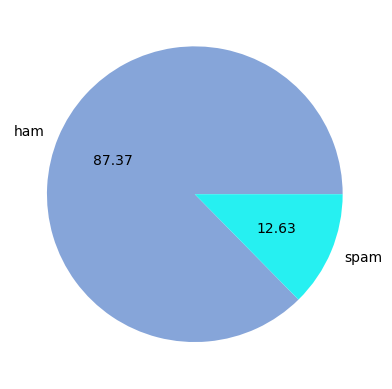

In [48]:
#viewing the target to know if balanced or not
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),colors=['#86A5D9','#26F0F1'],labels=['ham','spam'],autopct='%0.2f')
plt.show()    #this is used to that extra piece of code wont come when only upper code is run

In [49]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [50]:
from nltk.corpus import stopwords   #for stopwords

In [51]:
from nltk.stem.porter import PorterStemmer     #for stemming and creating stemmer obj ps
ps=PorterStemmer()

In [52]:
# finding number of characters used in text column using pandas
df['num_characters']=df['text'].apply(len)

In [53]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
# to count number of words, we require nltk 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [55]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [56]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
# "0" indicates that this is for "ham" messages. we are using describe on the below 3 columns of only ham messages to see the
#pattern of those messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
#clearly, we can see that spam messages are a bit longer than ham messages. lets see them by plotting too.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

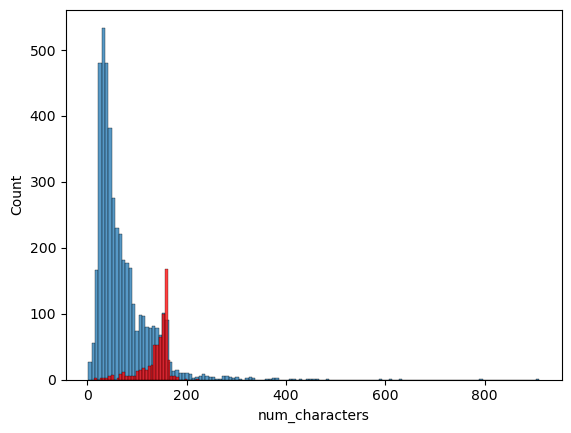

In [62]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

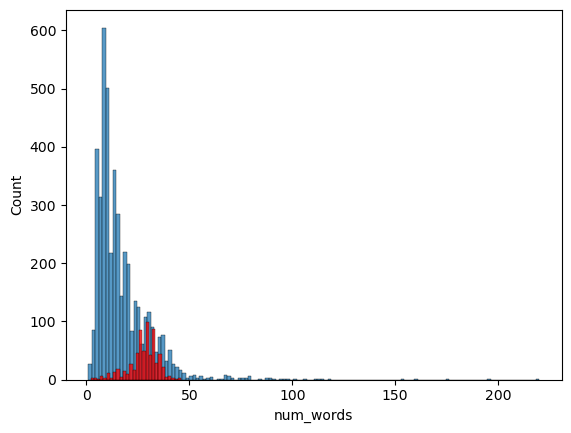

In [63]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


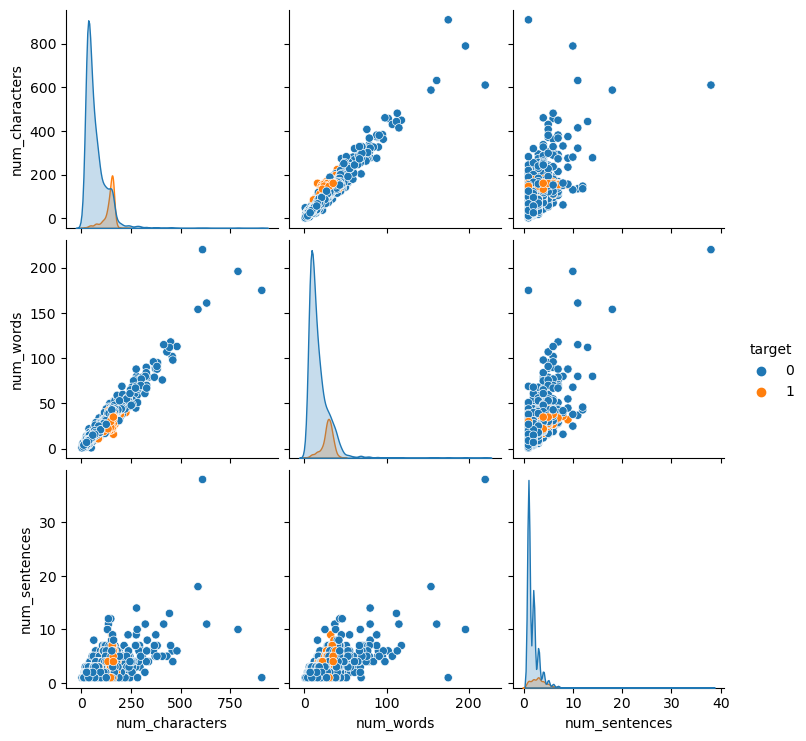

In [64]:
sns.pairplot(df,hue='target')

In [65]:

def transform_text(text):
    text=text.lower()    #converting the text into lowercase
    text=nltk.word_tokenize(text)    #using nltk for tokenization and gives each word of the text in the form of list
    # As the text is now converted in the form of list,now we will run the loop and then alphanumeric only taken
    y=[]    #initialize empty list
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
            y.append(ps.stem(i))
    
    
    return " ".join(y)

In [66]:
transform_text("Hello, this is sudip Paudel loving all the incoming")   #fn call

'hello sudip paudel love incom'

In [67]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [68]:
df['transformed_text']=df['text'].apply(transform_text)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
# creating wordcloud of hams and spam
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [74]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

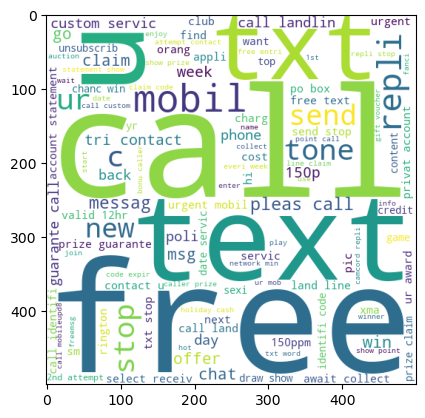

<Figure size 1500x600 with 0 Axes>

In [75]:
plt.imshow(spam_wc)
plt.figure(figsize=(15,6))

In [76]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

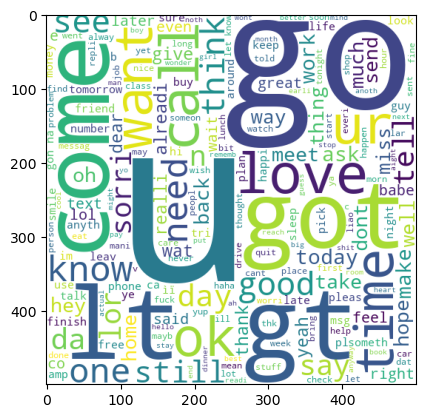

<Figure size 1500x600 with 0 Axes>

In [77]:
plt.imshow(ham_wc)
plt.figure(figsize=(15,6))

In [78]:
#lets look into top 30 words in both categories
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        spam_corpus.append(word)


In [80]:
len(spam_corpus)

9939

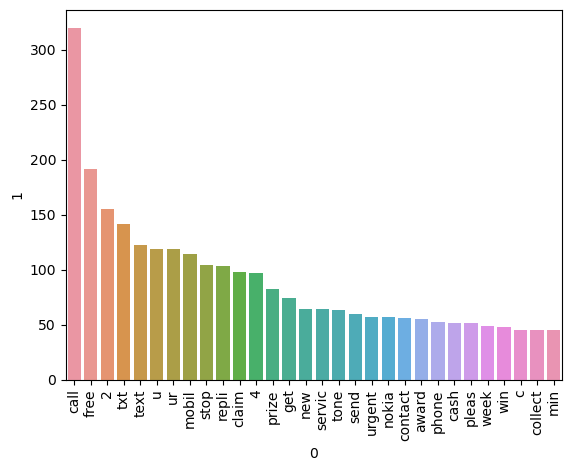

In [81]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        ham_corpus.append(word)

In [83]:
len(ham_corpus)

35404

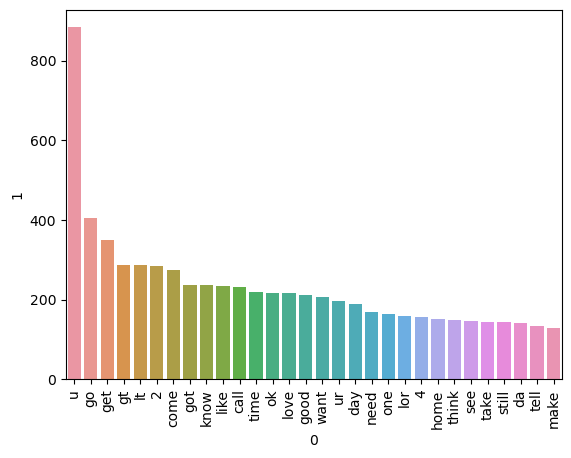

In [84]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [87]:
X=tfidf.fit_transform(df['transformed_text']).toarray()    #gives sparse array


In [88]:
X.shape

(5169, 2000)

In [89]:
y=df['target'].values

In [90]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [106]:
svc=SVC(kernel='sigmoid', gamma=1.0)
mnb=MultinomialNB()
lrc=LogisticRegression(solver='liblinear',penalty='l1')


In [107]:
# creating a dictionary having algorithm names as keys and  their objects as values
clfs={
    'SVC':svc,
    'NB':mnb,
    'LR':lrc
}

In [108]:
#creating fn "train_classifier" in which we are passing classifier, training and testing data
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

#here, Y_pred has list of predictions for X_test

In [109]:
#calling the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9669421487603306)

In [110]:

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy-  0.9758220502901354
Precision-  0.9669421487603306
For  NB
Accuracy-  0.97678916827853
Precision-  1.0
For  LR
Accuracy-  0.9574468085106383
Precision-  0.9607843137254902


In [111]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.976789,1.000000
0,SVC,0.975822,0.966942
2,LR,0.957447,0.960784
